In [87]:
import pandas as pd 
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


In [88]:
font = {'size': 10.0}

axes = {'grid': False,
        'titlesize': 10.0,
        'labelsize': 10.0,
        'titleweight': 'bold'}

lines = {'linewidth': 10,
         }

figure = {'facecolor': '0.75',
          'titlesize': 25.0,
          'titleweight': 'bold'}

legend = {'fontsize': 8,
          'labelspacing': 0.25}

grid = {'linewidth': 0.5
        # ,'alpha' : 0.2
}

plt.rc('font', **font)
plt.rc('axes', **axes)
plt.rc('lines', **lines)
#plt.rc ('figure' , **figure)
plt.rc('grid', **grid)
plt.rc('legend', **legend)

In [89]:
dir_path = "/Users/lohia/Downloads"
f_name = "temp_datalab_records_linkedin_company.csv"
data = pd.read_csv("%s/%s" %(dir_path,f_name)) 
pd.set_option('display.max_columns', None)
print data.head()

data['as_of_date'] = pd.to_datetime(data['as_of_date'])

   dataset_id  as_of_date            company_name  followers_count  \
0       58329  2015-09-14           Goldman Sachs           552254   
1       58329  2015-09-15           Goldman Sachs           552862   
2       58363  2015-09-16     United Technologies            59157   
3       58366  2015-09-16            Novo Nordisk           336175   
4       58371  2015-09-16  Lowe's Companies, Inc.           134255   

   employees_on_platform                                   link  \
0                  38124  https://www.linkedin.com/company/1382   
1                  38141  https://www.linkedin.com/company/1382   
2                  14982  https://www.linkedin.com/company/2426   
3                  26448  https://www.linkedin.com/company/2227   
4                  62574  https://www.linkedin.com/company/4128   

               industry              date_added            date_updated  \
0    Investment Banking  2015-09-14 00:00:00+00  2015-09-14 00:00:00+00   
1    Investment Banking  2

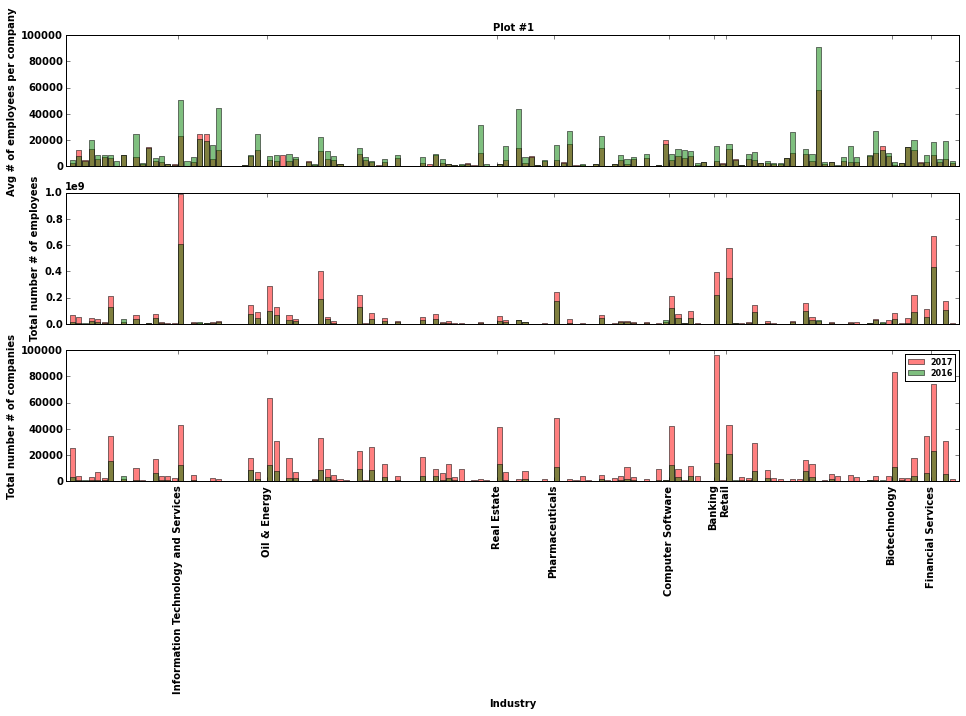

In [90]:
from collections import OrderedDict
data_2016_2017 = data[(data['as_of_date'] < '01/01/2018') & (data['as_of_date'] >= '01/01/2016')] #only use data for 2016 and 2017

data_2016_2017_industry = data_2016_2017.groupby(['industry'])

ncol = 1
nrow = 3

fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(12, 4), sharex=True)
counter = 0.5
counter_list = []
label_list_1 = []
for key in data_2016_2017_industry.groups.keys():
    industry = data_2016_2017_industry.get_group(key)
    industry_2016 = industry[(industry['as_of_date'] < '01/01/2017') & (industry['as_of_date'] >= '01/01/2016')]
    industry_2017 = industry[(industry['as_of_date'] < '01/01/2018') & (industry['as_of_date'] >= '01/01/2017')]

    for given_year, g_color,label in zip([industry_2017, industry_2016], ['red', 'green'], ['2017', '2016']):


        industry_size = given_year['as_of_date'].count()

        axes[2].bar(counter, industry_size, alpha=0.5, color= g_color,label=label)


        industry_size_employees = given_year['employees_on_platform'].sum()

        axes[1].bar(counter, industry_size_employees, alpha=0.5, color= g_color)

        if  given_year['as_of_date'].count() != 0:
            industry_size_vs_employees = given_year['employees_on_platform'].sum()/given_year['as_of_date'].count()

            axes[0].bar(counter, industry_size_vs_employees, alpha=0.5, color= g_color)

        if industry_size >= 40000:
            counter_list.append(counter)
            label_list_1.append(key)
    counter = counter + 1


plt.xticks(counter_list, label_list_1)
plt.xticks(rotation=90)
axes[0].set_ylabel('Avg # of employees per company')
axes[1].set_ylabel('Total number # of employees')
axes[2].set_ylabel('Total number # of companies')
axes[2].set_xlabel('Industry')
axes[0].legend(loc='best')
axes[0].set_title('Plot #1')
fig.set_size_inches(16,8)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.show()

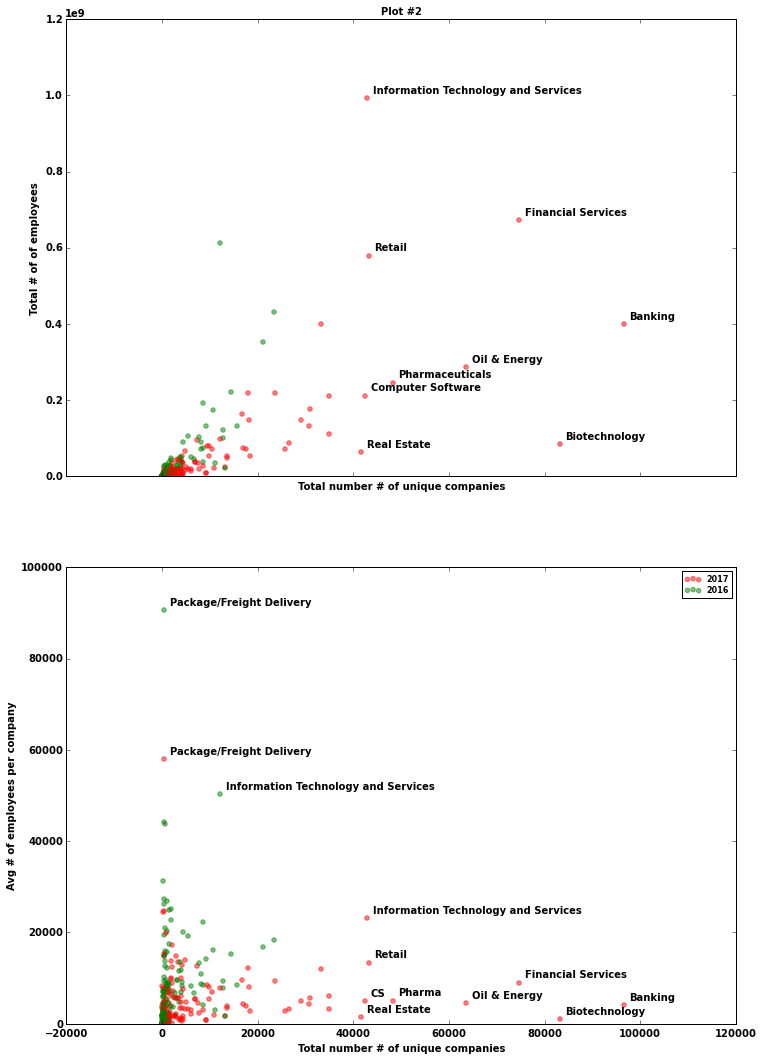

In [91]:
from collections import OrderedDict
from sklearn.linear_model import LinearRegression
data_2016_2017 = data[(data['as_of_date'] < '01/01/2018') & (data['as_of_date'] >= '01/01/2016')] #only use data for 2016 and 2017

data_2016_2017_industry = data_2016_2017.groupby(['industry'])

ncol = 2
nrow = int(np.ceil(data_2016_2017_industry.ngroups / ncol))
ncol = 1
nrow = 2

fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(12, 4), sharex=True)
counter = 0.5
counter_list = []
label_list_1 = []
for key in data_2016_2017_industry.groups.keys():
    industry = data_2016_2017_industry.get_group(key)
    industry_2016 = industry[(industry['as_of_date'] < '01/01/2017') & (industry['as_of_date'] >= '01/01/2016')]
    industry_2017 = industry[(industry['as_of_date'] < '01/01/2018') & (industry['as_of_date'] >= '01/01/2017')]

    for given_year, g_color,label in zip([industry_2017, industry_2016], ['red', 'green'], ['2017', '2016']):


            industry_size = given_year['as_of_date'].count()
            industry_size_employees = given_year['employees_on_platform'].sum()
            industry_size_vs_employees = given_year['employees_on_platform'].sum()/given_year['as_of_date'].count()
            axes[0].scatter(industry_size, industry_size_employees, alpha=0.5, color= g_color)
            axes[1].scatter(industry_size, industry_size_vs_employees, alpha=0.5, color= g_color,label=label)

            if industry_size >= 40000:
                axes[0].annotate(key, (industry_size, industry_size_employees),xytext=(6,5),textcoords='offset points')

            if industry_size >= 40000:
                if key == 'Computer Software':
                    axes[1].annotate('CS', (industry_size, industry_size_vs_employees),xytext=(6,5),textcoords='offset points')
                elif key == 'Pharmaceuticals':
                    axes[1].annotate('Pharma', (industry_size, industry_size_vs_employees),xytext=(6,5),textcoords='offset points')
                else:
                    axes[1].annotate(key, (industry_size, industry_size_vs_employees),xytext=(6,5),textcoords='offset points')
            if industry_size_vs_employees >= 45000:
                axes[1].annotate(key, (industry_size, industry_size_vs_employees),xytext=(6,5),textcoords='offset points')
    counter = counter + 1

axes[0].set_ylabel('Total # of of employees')
axes[1].set_ylabel('Avg # of employees per company')
axes[0].set_xlabel('Total number # of unique companies')
axes[1].set_xlabel('Total number # of unique companies')
axes[0].set_title('Plot #2')
axes[1].legend(loc='best')
axes[1].set_ylim(bottom=0)
axes[0].set_ylim(bottom=0)
fig.set_size_inches(12,18)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.show()